In [569]:
import numpy as np
import pandas as pd
import datetime
import Quandl
from matplotlib import pyplot as plt
from sklearn.linear_model import BayesianRidge
%matplotlib inline

In [570]:
# http://trading.cheno.net/downloading-google-intraday-historical-data-with-python/

In [571]:
# http://www.google.com/finance/getprices?q=TNXP&i=300&p=10d&f=d,o,h,l,c,v

In [572]:
!ls

Goog1MinuteData-Revised.ipynb
Goog5MinutePredict2Hours10days.ipynb
Goog5MinutePredict2Hours30Days.ipynb
Goog5MinutePredict2Hours30DaysOld.ipynb
Goog5MinutePredict30Mins.ipynb
GoogMinuteData.ipynb
Quandl.ipynb
WIKI_tickers.csv
authtoken.p
data.csv
tnxp_100days.csv
tnxp_goog_5min_10day.csv
tnxp_goog_5min_10day_clean.csv
tnxp_goog_5min_10day_fromJun18.csv
tnxp_goog_5min_30days_clean.csv
tnxp_goog_intraday_60sec_10days.csv
tnxp_goog_intraday_60sec_10days_clean.csv
tnxp_yahoo_10day_intraday.csv


In [573]:
!head tnxp_goog_5min_10day_fromJun18.csv

EXCHANGE%3DNASDAQ
MARKET_OPEN_MINUTE=570
MARKET_CLOSE_MINUTE=960
INTERVAL=300
COLUMNS=DATE,CLOSE,HIGH,LOW,OPEN,VOLUME
DATA=
TIMEZONE_OFFSET=-240
a1433511000,7.85,7.85,7.85,7.85,2575
1,7.8389,7.85,7.8224,7.8457,3475
2,7.91,7.93,7.8004,7.83,11892


In [574]:
stock_df = pd.read_csv("tnxp_100days.csv", skiprows=[0,1,2,3,5,6])

In [575]:
print stock_df.shape
stock_df.head()

(2923, 6)


,COLUMNS=DATE,CLOSE,HIGH,LOW,OPEN,VOLUME
0,a1428586200,6.08,6.08,6.0800,6.0800,2500
1,2,6.15,6.15,6.1156,6.1156,970
2,3,6.18,6.19,6.1700,6.1700,300
3,4,6.10,6.10,6.1000,6.1000,100
4,5,6.07,6.07,6.0700,6.0700,100


In [576]:
stock_df.rename(columns={'COLUMNS=DATE':'TIMEINDEX'}, inplace=True)

In [577]:
stock_df.replace(to_replace={'TIMEINDEX':{'a':''}}, regex=True, inplace=True)

In [578]:
stock_df.head()

,TIMEINDEX,CLOSE,HIGH,LOW,OPEN,VOLUME
0,1428586200,6.08,6.08,6.0800,6.0800,2500
1,2,6.15,6.15,6.1156,6.1156,970
2,3,6.18,6.19,6.1700,6.1700,300
3,4,6.10,6.10,6.1000,6.1000,100
4,5,6.07,6.07,6.0700,6.0700,100


In [579]:
time_indices = stock_df['TIMEINDEX'].values

In [580]:
time_indices = [int(x) for x in time_indices]

In [581]:
last_timestamp = time_indices[0]
for i in range(len(time_indices)):
    if time_indices[i] < last_timestamp:
        time_indices[i] = last_timestamp + (time_indices[i] * 300)
    else:
        last_timestamp = time_indices[i]
        
print time_indices[0:5]
print time_indices[-6:-1]

[1428586200, 1428586800, 1428587100, 1428587400, 1428587700]
[1434656100, 1434656400, 1434656700, 1434657000, 1434657300]


In [582]:
time_indices = [datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') for x in time_indices]
print time_indices[0:5]
print time_indices[-6:-1]

['2015-04-09 09:30:00', '2015-04-09 09:40:00', '2015-04-09 09:45:00', '2015-04-09 09:50:00', '2015-04-09 09:55:00']
['2015-06-18 15:35:00', '2015-06-18 15:40:00', '2015-06-18 15:45:00', '2015-06-18 15:50:00', '2015-06-18 15:55:00']


In [583]:
time_indices = [float(x[-8:-3].replace(':','.')) for x in time_indices]

In [584]:
stock_df['TIMEINDEX'] = time_indices

In [585]:
stock_df['MEDIAN_PRICE'] = stock_df[['CLOSE', 'HIGH', 'LOW', 'OPEN']].median(axis=1)

In [586]:
stock_df.describe()

,TIMEINDEX,CLOSE,HIGH,LOW,OPEN,VOLUME,MEDIAN_PRICE
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,12.603797,7.134925,7.151178,7.117745,7.134382,3202.341772,7.134653
std,1.966688,1.204618,1.213048,1.194666,1.204273,6251.318773,1.204287
min,9.300000,5.881000,5.900000,5.881000,5.900000,100.000000,5.900000
25%,11.050000,6.200000,6.210000,6.196800,6.200000,300.000000,6.200000
50%,12.500000,6.620000,6.640000,6.600000,6.620000,1083.000000,6.620000
75%,14.350000,7.750000,7.769900,7.740000,7.750000,3349.500000,7.751500
max,16.000000,10.430000,10.450000,10.415000,10.430000,107980.000000,10.425000


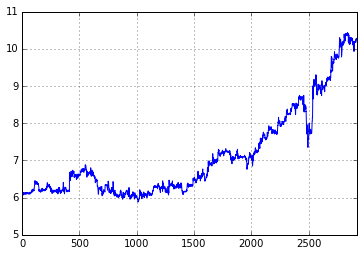

In [587]:
stock_df['CLOSE'].plot()
plt.show()

---

In [588]:
stock_df.head()

,TIMEINDEX,CLOSE,HIGH,LOW,OPEN,VOLUME,MEDIAN_PRICE
0,9.30,6.08,6.08,6.0800,6.0800,2500,6.0800
1,9.40,6.15,6.15,6.1156,6.1156,970,6.1328
2,9.45,6.18,6.19,6.1700,6.1700,300,6.1750
3,9.50,6.10,6.10,6.1000,6.1000,100,6.1000
4,9.55,6.07,6.07,6.0700,6.0700,100,6.0700


In [589]:
for col in stock_df.columns:
    stock_df["PREV" + col] = np.insert(stock_df[col].values[:-1], 0, stock_df[col][0])

In [590]:
print stock_df.shape
stock_df.head()

(2923, 14)


,TIMEINDEX,CLOSE,HIGH,LOW,OPEN,VOLUME,MEDIAN_PRICE,PREVTIMEINDEX,PREVCLOSE,PREVHIGH,PREVLOW,PREVOPEN,PREVVOLUME,PREVMEDIAN_PRICE
0,9.30,6.08,6.08,6.0800,6.0800,2500,6.0800,9.30,6.08,6.08,6.0800,6.0800,2500,6.0800
1,9.40,6.15,6.15,6.1156,6.1156,970,6.1328,9.30,6.08,6.08,6.0800,6.0800,2500,6.0800
2,9.45,6.18,6.19,6.1700,6.1700,300,6.1750,9.40,6.15,6.15,6.1156,6.1156,970,6.1328
3,9.50,6.10,6.10,6.1000,6.1000,100,6.1000,9.45,6.18,6.19,6.1700,6.1700,300,6.1750
4,9.55,6.07,6.07,6.0700,6.0700,100,6.0700,9.50,6.10,6.10,6.1000,6.1000,100,6.1000


In [591]:
stock_df.tail()

,TIMEINDEX,CLOSE,HIGH,LOW,OPEN,VOLUME,MEDIAN_PRICE,PREVTIMEINDEX,PREVCLOSE,PREVHIGH,PREVLOW,PREVOPEN,PREVVOLUME,PREVMEDIAN_PRICE
2918,15.40,10.26,10.26,10.2400,10.24,700,10.250,15.35,10.24,10.24,10.2400,10.24,100,10.240
2919,15.45,10.28,10.29,10.2700,10.29,2200,10.285,15.40,10.26,10.26,10.2400,10.24,700,10.250
2920,15.50,10.28,10.28,10.2700,10.28,2876,10.280,15.45,10.28,10.29,10.2700,10.29,2200,10.285
2921,15.55,10.26,10.28,10.2401,10.28,1488,10.270,15.50,10.28,10.28,10.2700,10.28,2876,10.280
2922,16.00,10.28,10.29,10.2300,10.29,14318,10.285,15.55,10.26,10.28,10.2401,10.28,1488,10.270


In [592]:
print [col for col in stock_df.columns]

['TIMEINDEX', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME', 'MEDIAN_PRICE', 'PREVTIMEINDEX', 'PREVCLOSE', 'PREVHIGH', 'PREVLOW', 'PREVOPEN', 'PREVVOLUME', 'PREVMEDIAN_PRICE']


In [593]:
stock_df["FUTURE(2HRS)MED_PRICE"] = np.append(stock_df['MEDIAN_PRICE'].values[24:], np.zeros(24))

In [594]:
print stock_df.shape
stock_df.head(25)

(2923, 15)


,TIMEINDEX,CLOSE,HIGH,LOW,OPEN,VOLUME,MEDIAN_PRICE,PREVTIMEINDEX,PREVCLOSE,PREVHIGH,PREVLOW,PREVOPEN,PREVVOLUME,PREVMEDIAN_PRICE,FUTURE(2HRS)MED_PRICE
0,9.30,6.0800,6.0800,6.0800,6.0800,2500,6.0800,9.30,6.0800,6.0800,6.0800,6.0800,2500,6.0800,6.1300
1,9.40,6.1500,6.1500,6.1156,6.1156,970,6.1328,9.30,6.0800,6.0800,6.0800,6.0800,2500,6.0800,6.1200
2,9.45,6.1800,6.1900,6.1700,6.1700,300,6.1750,9.40,6.1500,6.1500,6.1156,6.1156,970,6.1328,6.1300
3,9.50,6.1000,6.1000,6.1000,6.1000,100,6.1000,9.45,6.1800,6.1900,6.1700,6.1700,300,6.1750,6.1250
4,9.55,6.0700,6.0700,6.0700,6.0700,100,6.0700,9.50,6.1000,6.1000,6.1000,6.1000,100,6.1000,6.1100
5,10.05,6.0700,6.0700,6.0700,6.0700,100,6.0700,9.55,6.0700,6.0700,6.0700,6.0700,100,6.0700,6.1150
6,10.10,6.0700,6.0700,6.0700,6.0700,100,6.0700,10.05,6.0700,6.0700,6.0700,6.0700,100,6.0700,6.1200
7,10.25,6.0816,6.1400,6.0700,6.0800,6010,6.0808,10.10,6.0700,6.0700,6.0700,6.0700,100,6.0700,6.1000
8,10.35,6.0800,6.0800,6.0800,6.0800,200,6.0800,10.25,6.0816,6.1400,6.0700,6.0800,6010,6.0808,6.0900
9,10.45,6.0700,6.0700,6.0700,6.0700,400,6.0700,10.35,6.0800,6.0800,6.0800,6.0800,200,6.0800,6.1300


In [595]:
stock_df.tail()

,TIMEINDEX,CLOSE,HIGH,LOW,OPEN,VOLUME,MEDIAN_PRICE,PREVTIMEINDEX,PREVCLOSE,PREVHIGH,PREVLOW,PREVOPEN,PREVVOLUME,PREVMEDIAN_PRICE,FUTURE(2HRS)MED_PRICE
2918,15.40,10.26,10.26,10.2400,10.24,700,10.250,15.35,10.24,10.24,10.2400,10.24,100,10.240,0
2919,15.45,10.28,10.29,10.2700,10.29,2200,10.285,15.40,10.26,10.26,10.2400,10.24,700,10.250,0
2920,15.50,10.28,10.28,10.2700,10.28,2876,10.280,15.45,10.28,10.29,10.2700,10.29,2200,10.285,0
2921,15.55,10.26,10.28,10.2401,10.28,1488,10.270,15.50,10.28,10.28,10.2700,10.28,2876,10.280,0
2922,16.00,10.28,10.29,10.2300,10.29,14318,10.285,15.55,10.26,10.28,10.2401,10.28,1488,10.270,0


---

In [596]:
train_df = stock_df.ix[:stock_df.shape[0]-78]
print train_df.shape

(2846, 15)


In [597]:
test_df = stock_df.ix[stock_df.shape[0]-78:]
test_df.shape

(78, 15)

In [598]:
print [col for col in train_df.columns]

['TIMEINDEX', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME', 'MEDIAN_PRICE', 'PREVTIMEINDEX', 'PREVCLOSE', 'PREVHIGH', 'PREVLOW', 'PREVOPEN', 'PREVVOLUME', 'PREVMEDIAN_PRICE', 'FUTURE(2HRS)MED_PRICE']


In [599]:
X_train = train_df[['TIMEINDEX', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME', 'MEDIAN_PRICE', 'PREVTIMEINDEX', 'PREVCLOSE', 'PREVHIGH', 'PREVLOW', 'PREVOPEN', 'PREVVOLUME', 'PREVMEDIAN_PRICE']]
print X_train.shape
y_train = train_df[['FUTURE(2HRS)MED_PRICE']].values.flatten()
print y_train.shape

(2846, 14)
(2846,)


In [600]:
X_test = test_df[['TIMEINDEX', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME', 'MEDIAN_PRICE', 'PREVTIMEINDEX', 'PREVCLOSE', 'PREVHIGH', 'PREVLOW', 'PREVOPEN', 'PREVVOLUME', 'PREVMEDIAN_PRICE']]
print X_test.shape
y_test = test_df[['FUTURE(2HRS)MED_PRICE']].values.flatten()
print y_test.shape

(78, 14)
(78,)


In [601]:
clf = BayesianRidge(compute_score=True)
clf.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [602]:
test_index = stock_df.shape[0]-78
print "Prediction: " + str(clf.predict(test_df.ix[test_index].values[:-1])), "\n"
print test_df.ix[test_index]

Prediction: [ 10.52921624] 

TIMEINDEX                  15.5500
CLOSE                      10.4000
HIGH                       10.4000
LOW                        10.3564
OPEN                       10.3916
VOLUME                   7957.0000
MEDIAN_PRICE               10.3958
PREVTIMEINDEX              15.5000
PREVCLOSE                  10.3800
PREVHIGH                   10.4200
PREVLOW                    10.3600
PREVOPEN                   10.3918
PREVVOLUME               8546.0000
PREVMEDIAN_PRICE           10.3859
FUTURE(2HRS)MED_PRICE      10.2835
Name: 2845, dtype: float64


In [603]:
test_index = stock_df.shape[0]-30
print "Prediction: " + str(clf.predict(test_df.ix[test_index].values[:-1])), "\n"
print test_df.ix[test_index]

Prediction: [ 10.19468803] 

TIMEINDEX                   13.30000
CLOSE                       10.10000
HIGH                        10.15000
LOW                         10.07000
OPEN                        10.07000
VOLUME                     800.00000
MEDIAN_PRICE                10.08500
PREVTIMEINDEX               13.25000
PREVCLOSE                   10.05550
PREVHIGH                    10.14000
PREVLOW                     10.05000
PREVOPEN                    10.14000
PREVVOLUME               12061.00000
PREVMEDIAN_PRICE            10.09775
FUTURE(2HRS)MED_PRICE       10.24000
Name: 2893, dtype: float64


In [604]:
predictions = [round(x, 3) for x in clf.predict(X_test)]
print predictions

[10.529, 10.553, 10.474, 10.294, 10.326, 10.342, 10.369, 10.405, 10.375, 10.349, 10.249, 10.295, 10.282, 10.284, 10.286, 10.194, 10.189, 10.245, 10.284, 10.221, 10.262, 10.247, 10.254, 10.311, 10.336, 10.328, 10.339, 10.354, 10.343, 10.329, 10.299, 10.325, 10.297, 10.289, 10.307, 10.316, 10.346, 10.352, 10.341, 10.349, 10.305, 10.284, 10.229, 10.261, 10.253, 10.244, 10.237, 10.183, 10.195, 10.208, 10.279, 10.253, 10.143, 10.247, 10.24, 10.216, 10.236, 10.288, 10.296, 10.289, 10.294, 10.3, 10.301, 10.292, 10.308, 10.322, 10.314, 10.295, 10.322, 10.336, 10.4, 10.433, 10.379, 10.367, 10.391, 10.402, 10.385, 10.411]


In [605]:
y_test = [round(x, 3) for x in y_test]
print y_test

[10.284, 10.275, 10.292, 10.293, 10.275, 10.245, 10.24, 10.258, 10.23, 10.225, 10.245, 10.24, 10.281, 10.278, 10.275, 10.278, 10.24, 10.204, 10.165, 10.19, 10.17, 10.16, 10.15, 10.098, 10.085, 10.125, 10.19, 10.151, 10.04, 10.107, 10.155, 10.11, 10.14, 10.2, 10.19, 10.185, 10.2, 10.203, 10.2, 10.199, 10.195, 10.2, 10.195, 10.185, 10.21, 10.215, 10.233, 10.255, 10.24, 10.25, 10.285, 10.28, 10.27, 10.285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [606]:
diff = [round(x, 3) for x in (np.array(predictions) - np.array(y_test))]
print diff[:-24]

[0.245, 0.278, 0.182, 0.001, 0.051, 0.097, 0.129, 0.147, 0.145, 0.124, 0.004, 0.055, 0.001, 0.006, 0.011, -0.084, -0.051, 0.041, 0.119, 0.031, 0.092, 0.087, 0.104, 0.213, 0.251, 0.203, 0.149, 0.203, 0.303, 0.222, 0.144, 0.215, 0.157, 0.089, 0.117, 0.131, 0.146, 0.149, 0.141, 0.15, 0.11, 0.084, 0.034, 0.076, 0.043, 0.029, 0.004, -0.072, -0.045, -0.042, -0.006, -0.027, -0.127, -0.038]


In [607]:
lower = 0
for val in diff:
    if val < 0:
        lower += 1
    
print len(diff), lower

78 9
